Data Science Project
Rakan Alkheliwi

Initialize libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import visuals as vs

%matplotlib inline

Read Data

In [30]:
seattle_cal = pd.read_csv("./seattle/calendar.csv")
seattle_list = pd.read_csv("./seattle/listings.csv")
seattle_rev = pd.read_csv("./seattle/reviews.csv")
boston_cal = pd.read_csv("./boston-airbnb-open-data/calendar.csv")
boston_list = pd.read_csv("./boston-airbnb-open-data/listings.csv")
boston_rev = pd.read_csv("./boston-airbnb-open-data/reviews.csv")

Explore datasets

In [3]:
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Seattle Calender shows listing id combined with date, available, and price.

In [4]:
seattle_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Contains 92 columns but many of them seem like description so can be deleted

In [5]:
seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


It contains reviews by people. At first look, it seems this data has been collected in previous dataframe as it contain number of reviews. So, I will not be using reviews.

In [6]:
boston_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [ ]:
boston_list.head()


In [ ]:
boston_rev.head()

Data processing and cleaning

First thing to be done is to create one dataframe that contains all data for seattle and boston ignoring reviews. We will join dataframes of calender and listing to each other for each city. Then, we will combine cities.

In [31]:
seattle_cal = seattle_cal.rename(columns={'listing_id': 'id'})
boston_cal = boston_cal.rename(columns={'listing_id': 'id'})
seattle=pd.merge(seattle_list,seattle_cal,on='id',how='outer')
boston=pd.merge(boston_list,boston_cal,on='id',how='outer')
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-04,t,$85.00
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-05,t,$85.00
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-06,f,NaN
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-07,f,NaN
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-08,f,NaN


In [ ]:
seattle.head()

Now create dummy columns for each city that contain name of city and then merge two dataframes together.

In [32]:
seattle['city'] = 'seattle'
boston['city'] = 'boston'
df = pd.concat([seattle,boston],ignore_index=True)
df['city']

0          seattle
1          seattle
2          seattle
3          seattle
4          seattle
5          seattle
6          seattle
7          seattle
8          seattle
9          seattle
10         seattle
11         seattle
12         seattle
13         seattle
14         seattle
15         seattle
16         seattle
17         seattle
18         seattle
19         seattle
20         seattle
21         seattle
22         seattle
23         seattle
24         seattle
25         seattle
26         seattle
27         seattle
28         seattle
29         seattle
            ...   
2702430     boston
2702431     boston
2702432     boston
2702433     boston
2702434     boston
2702435     boston
2702436     boston
2702437     boston
2702438     boston
2702439     boston
2702440     boston
2702441     boston
2702442     boston
2702443     boston
2702444     boston
2702445     boston
2702446     boston
2702447     boston
2702448     boston
2702449     boston
2702450     boston
2702451     

time to clean out dataframe. First, we get a summary of what is inside this dataframe. I can see from head that there are columns that are not necessary and difficult to analyze as they contain a lot of jibrish text. I will go ahead and delete them. But first, let's analyze missing data as this easier in dropping columns.

In [ ]:
df.describe()

In [ ]:
df.shape

Identify columns and rows with all missing values and drop them

In [ ]:
df.dropna(axis='columns',how='all')
df.dropna(how='all')
df.head()

Identify columsn with more than 75% of values missing

In [9]:
df_75 = df.columns[(df.count()/len(df)) <= .75]
df_75

Index(['access', 'cleaning_fee', 'has_availability', 'host_about',
       'house_rules', 'interaction', 'jurisdiction_names', 'license',
       'monthly_price', 'neighborhood_overview',
       'neighbourhood_group_cleansed', 'notes', 'price_y', 'security_deposit',
       'square_feet', 'transit', 'weekly_price'],
      dtype='object')

We will analyze what values are inside these columsn to determine their importance

In [ ]:
df['access'].value_counts()

This cell contain values that are duplicate of another columns amneties as shown below. So I will delete it.

In [ ]:
df['amenities'].value_counts()

Next is cleaning fee

In [ ]:
df['cleaning_fee'].value_counts()

The cleaning fee has important values that are difficult to ignore. Maybe empty means zero. Let's analyze that

In [ ]:
df[df['cleaning_fee']==0]

As you see, there are no rooms with cleaning fee equels to zero. So, it is safe to assume that empty means 0 in this case for cleaning fees. Next, I will analyze has_availability

In [ ]:
df['has_availability'].value_counts()

It seems to be same situation as before with cleaning fee; empty equels to false. Next, I analyze host_about

In [ ]:
df['host_about'].value_counts()

I will delete this row since it is text and 75% of it is empty.

In [ ]:
df['house_rules'].value_counts()

Same as about us.

In [ ]:
df['interaction'].value_counts()

Also interaction will be deleted.

In [ ]:
df['jurisdiction_names'].value_counts()

I will delete this one as it doesn't add value. City adds more value than what state people belong to. I will then analyze license.

In [ ]:
df['license'].value_counts()

It is strange that this wasn't deleted by dropna. Now, I will analyze monthly_price and weekly_price

In [ ]:
df['monthly_price'].value_counts()
df[df['monthly_price']==0]

In [ ]:
df[df['weekly_price']==0]

weekly price and monthly price if empty means 0 or not appliable. Now, I will analyze neighborhood_overview

In [ ]:
df['neighborhood_overview'].value_counts()

I will delete neighborhood but I wish if there is a value that incdicate it.

In [ ]:
df['neighbourhood_group_cleansed'].value_counts()

In [ ]:
df[df['city']=='boston']['neighbourhood_group_cleansed'].value_counts()

In [ ]:
df[df['city']=='seattle']['neighbourhood'].value_counts()

We can delete neighborhood cleansed as we have neighborhood column filled for both seattle and boston while cleansed is not found for boston.

In [ ]:
df['notes'].value_counts()

We delete this column too. price_y and price_x need to be compared first.

In [ ]:
df.shape

In [ ]:
df['price_x'].count()

In [ ]:
df['price_y'].count()

In [ ]:
df[df['price_x']!=df['price_y']]['price_y'].count()

As we analyze, we find that there are disparency between price in cal and list. cal has complete info while listing doesn't. So we can delete price_y.

In [ ]:
df[df['security_deposit']==0]

Empty deposit means 0.

In [ ]:
df['square_feet'].value_counts()


Number of bedrooms is a safe indicator of space. Also as we at it, I will delete space column as it has a lot of jibrish.

In [ ]:
df['transit'].value_counts()

We delete columns now

In [33]:
df.drop(inplace=True,columns=['interaction','space','price_y','transit','notes','square_feet','neighbourhood_group_cleansed','neighborhood_overview','jurisdiction_names','license','house_rules','host_about','access'])

We fill na values with zero for above columns we indicated before

In [34]:
df['weekly_price'].fillna(inplace=True,value=0)
df['monthly_price'].fillna(inplace=True,value=0)
df['security_deposit'].fillna(inplace=True,value=0)
df['cleaning_fee'].fillna(inplace=True,value=0)
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,bedrooms,...,scrape_id,security_deposit,smart_location,state,street,summary,thumbnail_url,weekly_price,xl_picture_url,zipcode
0,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,t,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
1,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,t,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
2,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,f,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,f,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
4,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,f,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119


In [35]:
df['has_availability'].fillna(inplace=True,value=False)

We check those have more than half empty

In [500]:
df_50 = df.columns[(df.count()/len(df)) <= .50]
df_50

Index([], dtype='object')

To trim more columns as we have many, I will analyze data with object types

In [60]:
str_col = df.select_dtypes('object').columns
str_col

Index(['amenities', 'bed_type', 'calendar_last_scraped', 'calendar_updated',
       'cancellation_policy', 'city', 'cleaning_fee', 'date',
       'experiences_offered', 'extra_people', 'first_review',
       'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_location',
       'host_neighbourhood', 'host_response_rate', 'host_response_time',
       'host_since', 'host_verifications', 'last_review', 'last_scraped',
       'market', 'monthly_price', 'neighbourhood', 'neighbourhood_cleansed',
       'price_x', 'property_type', 'room_type', 'security_deposit',
       'smart_location', 'weekly_price'],
      dtype='object')

amneities will be converted to a numerical number that inciates number of amneities

In [36]:
df.replace(inplace=True,to_replace='t',value=True)
df.replace(inplace=True,to_replace='f',value=False)
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,bedrooms,...,scrape_id,security_deposit,smart_location,state,street,summary,thumbnail_url,weekly_price,xl_picture_url,zipcode
0,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,True,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
1,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,True,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
2,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,False,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,False,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
4,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,False,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119


In [56]:
str_col

Index(['amenities', 'available', 'bed_type', 'calendar_last_scraped',
       'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee',
       'country', 'country_code', 'date', 'description', 'experiences_offered',
       'extra_people', 'first_review', 'has_availability',
       'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_location',
       'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_url', 'host_verifications',
       'instant_bookable', 'is_location_exact', 'last_review', 'last_scraped',
       'listing_url', 'market', 'medium_url', 'monthly_price', 'name',
       'neighbourhood', 'neighbourhood_cleansed', 'picture_url', 'price_x',
       'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license', 'room_type',
       'security_deposit', 'smart_location

In [57]:
df['bed_type'].value_counts()

Real Bed         2595515
Futon              45625
Pull-out Sofa      28470
Airbed             24455
Couch               8395
Name: bed_type, dtype: int64

bed type is categorical.

In [58]:
df['calendar_last_scraped'].value_counts()

2016-01-04    1393570
2016-09-06    1308890
Name: calendar_last_scraped, dtype: int64

By looking at title names, I will delete: country, country_code, description, host_name, host_picture_url, host_thumbnail_url, host_url, listing_url, medium_url, name, picture_url, state, street, summary, zipcode, xl_picture_url, thumbnail_url

In [37]:
df.drop(inplace=True,columns=['country', 'country_code', 'description', 'host_name', 'host_picture_url', 'host_thumbnail_url', 'host_url', 'listing_url', 'medium_url', 'name', 'picture_url', 'state', 'street', 'summary', 'zipcode', 'xl_picture_url', 'thumbnail_url'])

Now, we will analyze the object columsn that we have

In [447]:
df['calendar_updated'].value_counts()

today            561735
2 weeks ago      238710
a week ago       214985
3 weeks ago      190165
2 months ago     162790
yesterday        147825
4 weeks ago      135415
3 months ago     127385
4 days ago       114245
5 weeks ago      103660
5 days ago        96360
3 days ago        95995
4 months ago      79570
6 weeks ago       72635
2 days ago        70810
5 months ago      53655
7 weeks ago       36500
7 months ago      24090
6 days ago        23360
1 week ago        22630
6 months ago      22265
8 months ago      16790
10 months ago     16425
never             15695
9 months ago      15330
11 months ago      8030
13 months ago      7665
14 months ago      7300
12 months ago      6570
17 months ago      3650
15 months ago      3285
16 months ago      2920
22 months ago      1095
25 months ago       730
18 months ago       730
30 months ago       730
23 months ago       365
20 months ago       365
Name: calendar_updated, dtype: int64

We could convert these values to number of weeks. We will delete last scraped value as it not related to our analysis

In [38]:
df.drop(inplace=True,columns='calendar_last_scraped')

In [39]:
def func(x):
    if('a week' in x):
        return 1
    elif('week' in x):
        return str.split(x)[0]
    elif ('month' in x):
        return int(str.split(x)[0])*4
    elif ('never' in x):
        return int(0)
    else:
        return int(1)

df['scratch']=df['calendar_updated'].apply(lambda x:func(x))


In [505]:
df.describe()

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,...,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,scrape_id
count,2.702460e+06,2.702460e+06,2.702460e+06,2.702460e+06,2.702460e+06,2.691510e+06,2.696620e+06,2.698810e+06,2.702460e+06,2.702460e+06,...,2.702460e+06,2.161530e+06,2.162625e+06,2.165180e+06,2.165910e+06,2.162990e+06,2.169195e+06,2.162990e+06,2.197300e+06,2.702460e+06
mean,3.200027e+00,1.284711e+01,2.130712e+02,2.956253e+01,4.863182e+01,1.241117e+00,1.282620e+00,1.674195e+00,7.686791e+00,1.554970e+00,...,2.068125e+01,9.540865e+00,9.721181e+00,9.417229e+00,9.733569e+00,9.518056e+00,9.331600e+01,9.319777e+00,2.028161e+00,2.016049e+13
std,1.889962e+00,1.206861e+01,1.383328e+02,2.383737e+01,3.501049e+01,5.493412e-01,8.231467e-01,1.081238e+00,2.146306e+01,1.200612e+00,...,3.672886e+01,8.217136e-01,6.821897e-01,9.991873e-01,6.565342e-01,7.752466e-01,8.206763e+00,8.927488e-01,1.968533e+00,4.009044e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+01,2.000000e+00,1.000000e-02,2.016010e+13
25%,2.000000e+00,0.000000e+00,7.700000e+01,1.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,9.000000e+00,1.000000e+01,9.000000e+00,1.000000e+01,9.000000e+00,9.100000e+01,9.000000e+00,5.900000e-01,2.016010e+13
50%,2.000000e+00,1.000000e+01,2.590000e+02,3.100000e+01,5.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,7.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,9.600000e+01,9.000000e+00,1.370000e+00,2.016010e+13
75%,4.000000e+00,2.600000e+01,3.470000e+02,5.500000e+01,8.400000e+01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,...,2.300000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+01,1.000000e+01,2.890000e+00,2.016091e+13
max,1.600000e+01,3.000000e+01,3.650000e+02,6.000000e+01,9.000000e+01,8.000000e+00,7.000000e+00,1.600000e+01,1.360000e+02,1.500000e+01,...,4.740000e+02,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+02,1.000000e+01,1.915000e+01,2.016091e+13


In [109]:
df['cancellation_policy'].value_counts()

strict             1094635
moderate            792415
flexible            784385
super_strict_30      31025
Name: cancellation_policy, dtype: int64

cancellation_policy is categorical variable

In [111]:
df['experiences_offered'].value_counts()

none    2702460
Name: experiences_offered, dtype: int64

experiences_offered is a silly column. We can delete it.

In [40]:
df.drop(inplace=True,columns='experiences_offered')

In [113]:
df['extra_people'].value_counts()

$0.00      1554900
$25.00      218635
$10.00      206955
$20.00      198925
$15.00      162425
$50.00       94170
$30.00       59860
$5.00        31025
$35.00       30295
$40.00       29565
$100.00      17885
$45.00       10585
$75.00        8395
$7.00         5840
$12.00        5840
$60.00        5110
$17.00        4380
$8.00         4380
$29.00        4015
$19.00        3285
$49.00        3285
$18.00        2920
$9.00         2555
$39.00        2555
$70.00        2555
$24.00        2190
$80.00        2190
$22.00        1825
$200.00       1825
$6.00         1825
            ...   
$150.00       1460
$37.00        1460
$65.00        1095
$28.00        1095
$27.00        1095
$16.00        1095
$36.00        1095
$59.00         730
$33.00         730
$34.00         730
$85.00         730
$300.00        730
$44.00         730
$69.00         365
$125.00        365
$13.00         365
$68.00         365
$89.00         365
$42.00         365
$120.00        365
$77.00         365
$250.00     

This is a great column. We keep it.

In [115]:
df['host_acceptance_rate'].value_counts()

100%    1552710
55%       50735
91%       41975
94%       41245
98%       35405
67%       32485
68%       32485
45%       29200
99%       27375
95%       25550
93%       24455
96%       20440
81%       19710
0%        18250
50%       17520
83%       16425
89%       15330
97%       14235
33%       13140
92%       12410
88%       12410
56%       12045
75%       11315
90%       11315
36%        9855
86%        9855
69%        9125
82%        8760
80%        8760
66%        7665
         ...   
79%        3650
25%        2920
74%        2920
65%        2555
58%        2190
46%        2190
42%        2190
61%        1825
19%        1825
64%        1825
72%        1825
20%        1460
30%        1095
29%        1095
62%        1095
40%        1095
38%         730
17%         730
54%         730
43%         730
53%         365
28%         365
51%         365
47%         365
52%         365
48%         365
59%         365
23%         365
18%         365
44%         365
Name: host_acceptance_ra

In [116]:
df['host_has_profile_pic'].value_counts()

True     2696255
False       5475
Name: host_has_profile_pic, dtype: int64

In [117]:
df['host_identity_verified'].value_counts()

True     2044365
False     657365
Name: host_identity_verified, dtype: int64

In [118]:
df['host_is_superhost'].value_counts()

False    2269205
True      432525
Name: host_is_superhost, dtype: int64

In [119]:
df['host_location'].value_counts()

Seattle, Washington, United States                 1189900
Boston, Massachusetts, United States                884395
US                                                  279955
New York, New York, United States                    43800
Spokane, Washington, United States                   24090
Montreal, Quebec, Canada                             21535
Middlesex County, Massachusetts, United States       18250
Cambridge, Massachusetts, United States              15695
Kent, Washington, United States                      12410
Massachusetts, United States                         10585
Brookline, Massachusetts, United States               6935
San Francisco, California, United States              6570
Somerville, Massachusetts, United States              6205
Los Angeles, California, United States                5840
Bellevue, Washington, United States                   4380
Milton, Massachusetts, United States                  3650
Mercer Island, Washington, United States              36

In [121]:
df['host_neighbourhood'].value_counts()

Capitol Hill                 147825
Allston-Brighton             136875
Jamaica Plain                117165
Back Bay                     113880
Fenway/Kenmore               106580
Belltown                      92710
South End                     85045
Dorchester                    79570
Ballard                       76650
South Boston                  72270
Beacon Hill                   70810
Minor                         69715
Queen Anne                    68985
Fremont                       53655
Roxbury                       52195
Wallingford                   48910
North End                     45990
Central Business District     43070
East Boston                   41610
North Beacon Hill             36865
Ravenna                       36500
Mission Hill                  35040
Stevens                       31755
First Hill                    31025
West End                      29930
University District           29200
Greenwood                     29200
Lower Queen Anne            

It seems host neighborhood is varied and not indicative of value of property. So we can delete it.

In [41]:
df.drop(inplace=True,columns='host_neighbourhood')

Regarding host location it is varied. But it would be great to see if host if found at same location as his property.

In [42]:
df['host_location']=df['host_location'].fillna("NA")
df['same_location'] = df.apply(lambda x: x['city'] in x['host_location'].lower(), axis=1)

In [151]:
df['same_location'].value_counts()

True     2087435
False     615025
Name: same_location, dtype: int64

In [43]:
df.drop(inplace=True,columns='host_location')

In [153]:
df['host_response_rate'].value_counts()

100%    1622060
90%       98915
98%       81395
80%       51830
99%       47450
89%       43435
96%       43070
94%       27010
50%       26645
88%       26280
71%       25550
97%       20805
92%       20440
67%       20440
70%       17520
75%       16790
86%       14965
93%       13140
60%       12775
95%       10950
83%       10950
91%        8030
33%        7300
79%        6570
78%        6570
77%        6205
40%        6205
73%        5840
0%         4745
63%        4380
81%        3285
69%        2920
85%        2555
43%        1825
82%        1825
64%        1460
30%        1460
25%        1460
17%        1095
36%        1095
31%        1095
57%        1095
87%        1095
76%        1095
61%         730
68%         730
56%         730
10%         730
14%         730
38%         730
84%         730
58%         730
55%         365
19%         365
53%         365
65%         365
20%         365
6%          365
Name: host_response_rate, dtype: int64

In [154]:
df['host_response_time'].value_counts()

within an hour        1123105
within a few hours     797890
within a day           389090
a few days or more      29565
Name: host_response_time, dtype: int64

response rate and response time are related to each other so we can delete one of them. I elect to delete time as it categorical and not as indicative as rate.

In [44]:
df.drop(inplace=True,columns='host_response_time')

In [157]:
df['instant_bookable'].value_counts()

False    2269935
True      432525
Name: instant_bookable, dtype: int64

In [158]:
df['is_location_exact'].value_counts()

True     2369945
False     332515
Name: is_location_exact, dtype: int64

In [45]:
df.drop(inplace=True,columns='last_scraped')

In [161]:
df['market'].value_counts()

Seattle                  1393570
Boston                   1302685
Other (Domestic)             365
San Francisco                365
Other (International)        365
Name: market, dtype: int64

We will delete market and last scraped as we going to use city instead.

In [46]:
df.drop(inplace=True,columns='market')

In [165]:
df['neighbourhood_cleansed'].value_counts()

Broadway                     144905
Jamaica Plain                125195
South End                    118990
Back Bay                     110230
Fenway                       105850
Dorchester                    98185
Allston                       94900
Belltown                      85410
Brighton                      72270
Beacon Hill                   70810
South Boston                  63510
Downtown                      63145
Wallingford                   60955
Fremont                       57670
East Boston                   54750
Roxbury                       52560
North End                     52195
Minor                         49275
Mission Hill                  45260
University District           44530
Stevens                       43435
Charlestown                   40515
First Hill                    39420
Central Business District     37595
Lower Queen Anne              34310
Greenwood                     32485
South Boston Waterfront       30295
East Queen Anne             

We go with neighborhood cleansed nstead of regular one

In [47]:
df.drop(inplace=True,columns='neighbourhood')

In [167]:
df['property_type'].value_counts()

Apartment          1577165
House               837675
Condominium         117530
Townhouse            62780
Loft                 28835
Bed & Breakfast      28470
Other                14235
Cabin                 7665
Boat                  7300
Camper/RV             5110
Bungalow              4745
Villa                 2190
Tent                  1825
Entire Floor          1460
Dorm                  1460
Treehouse             1095
Chalet                 730
Yurt                   365
Guesthouse             365
Name: property_type, dtype: int64

property type is categorical

In [168]:
df['require_guest_phone_verification'].value_counts()

False    2479080
True      223380
Name: require_guest_phone_verification, dtype: int64

In [169]:
df['require_guest_profile_picture'].value_counts()

False    2560840
True      141620
Name: require_guest_profile_picture, dtype: int64

In [170]:
df['requires_license'].value_counts()

False    2702460
Name: requires_license, dtype: int64

We can go ahead and delete this variable.

In [48]:
df.drop(inplace=True,columns='requires_license')

In [172]:
df['room_type'].value_counts()

Entire home/apt    1704185
Private room        926370
Shared room          71905
Name: room_type, dtype: int64

Categorical and important

In [51]:
df['smart_location'].value_counts()
df['city']

0          seattle
1          seattle
2          seattle
3          seattle
4          seattle
5          seattle
6          seattle
7          seattle
8          seattle
9          seattle
10         seattle
11         seattle
12         seattle
13         seattle
14         seattle
15         seattle
16         seattle
17         seattle
18         seattle
19         seattle
20         seattle
21         seattle
22         seattle
23         seattle
24         seattle
25         seattle
26         seattle
27         seattle
28         seattle
29         seattle
            ...   
2702430     boston
2702431     boston
2702432     boston
2702433     boston
2702434     boston
2702435     boston
2702436     boston
2702437     boston
2702438     boston
2702439     boston
2702440     boston
2702441     boston
2702442     boston
2702443     boston
2702444     boston
2702445     boston
2702446     boston
2702447     boston
2702448     boston
2702449     boston
2702450     boston
2702451     

In [52]:
df.drop(inplace=True,columns='smart_location')

Now, let's take columns we know are not object and convert them

In [53]:
str_col = df.select_dtypes('object').columns
str_col

Index(['amenities', 'bed_type', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'date', 'extra_people', 'first_review',
       'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_response_rate',
       'host_since', 'host_verifications', 'last_review', 'monthly_price',
       'neighbourhood_cleansed', 'price_x', 'property_type', 'room_type',
       'security_deposit', 'weekly_price', 'scratch'],
      dtype='object')

We convert following to int: cleaning fee, extra people, monthly price, price_x, security_deposit, weekly price and not forget to change name of price_x to price.
We convert the following to boolean: host_has_profile_pic,host_identity_verified,host_is_superhost
And to float, we convert: host_response_rate.
We already filled missing values so we can go ahead and convert.

In [54]:
df['price']=df['price_x']
df.drop(inplace=True,columns='price_x')

In [517]:
df.to_pickle('./clean_data.pkl')

In [55]:
df['cleaning_fee']=df['cleaning_fee'].replace('[$,]','',regex=True).astype(float).astype(int)
df['extra_people']=df['extra_people'].replace('[$,]','',regex=True).astype(float).astype(int)
df['monthly_price']=df['monthly_price'].replace('[$,]','',regex=True).astype(float).astype(int)
df['weekly_price']=df['weekly_price'].replace('[$,]','',regex=True).astype(float).astype(int)
df['price']=df['price'].replace('[$,]','',regex=True).astype(float).astype(int)
df['security_deposit']=df['security_deposit'].replace('[$,]','',regex=True).astype(float).astype(int)


In [367]:
str_col = df.select_dtypes('object').columns
str_col

Index(['amenities', 'bed_type', 'calendar_updated', 'cancellation_policy',
       'city', 'date', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_response_rate',
       'host_since', 'host_verifications', 'last_review',
       'neighbourhood_cleansed', 'property_type', 'room_type'],
      dtype='object')

In [56]:
df['host_has_profile_pic'].astype(bool)
df['host_identity_verified'].astype(bool)
df['host_is_superhost'].astype(bool)

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2702430    False
2702431    False
2702432    False
2702433    False
2702434    False
2702435    False
2702436    False
2702437    False
2702438    False
2702439    False
2702440    False
2702441    False
2702442    False
2702443    False
2702444    False
2702445    False
2702446    False
2702447    False
2702448    False
2702449    False
2702450    False
2702451    False
2702452    False
2702453    False
2702454    False
2702455    False
2702456    False
2702457    Fal

In [57]:
df['host_acceptance_rate']=df['host_acceptance_rate'].replace('[%]','',regex=True).astype(float)/100
df['host_acceptance_rate']

0          1.00
1          1.00
2          1.00
3          1.00
4          1.00
5          1.00
6          1.00
7          1.00
8          1.00
9          1.00
10         1.00
11         1.00
12         1.00
13         1.00
14         1.00
15         1.00
16         1.00
17         1.00
18         1.00
19         1.00
20         1.00
21         1.00
22         1.00
23         1.00
24         1.00
25         1.00
26         1.00
27         1.00
28         1.00
29         1.00
           ... 
2702430    0.95
2702431    0.95
2702432    0.95
2702433    0.95
2702434    0.95
2702435    0.95
2702436    0.95
2702437    0.95
2702438    0.95
2702439    0.95
2702440    0.95
2702441    0.95
2702442    0.95
2702443    0.95
2702444    0.95
2702445    0.95
2702446    0.95
2702447    0.95
2702448    0.95
2702449    0.95
2702450    0.95
2702451    0.95
2702452    0.95
2702453    0.95
2702454    0.95
2702455    0.95
2702456    0.95
2702457    0.95
2702458    0.95
2702459    0.95
Name: host_acceptance_ra

Now, we work with missing values

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
          ... 
2702430    NaN
2702431    NaN
2702432    NaN
2702433    NaN
2702434    NaN
2702435    NaN
2702436    NaN
2702437    NaN
2702438    NaN
2702439    NaN
2702440    NaN
2702441    NaN
2702442    NaN
2702443    NaN
2702444    NaN
2702445    NaN
2702446    NaN
2702447    NaN
2702448    NaN
2702449    NaN
2702450    NaN
2702451    NaN
2702452    NaN
2702453    NaN
2702454    NaN
2702455    NaN
2702456    NaN
2702457    NaN
2702458    NaN
2702459    NaN
Name: weekly_price, Length: 2702460, dtype: object

In [521]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['bathrooms', 'bedrooms', 'beds', 'first_review', 'host_acceptance_rate',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_response_rate', 'host_since',
       'host_total_listings_count', 'last_review', 'property_type',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month'],
      dtype='object')

In [269]:
df['review_scores_checkin'].value_counts()

10.0    1719150
9.0      345655
8.0       69350
7.0       11680
6.0        9855
4.0        4015
2.0        1825
5.0        1095
Name: review_scores_checkin, dtype: int64

For review_scores_accuracy, we can fill empty values with 0 to indicate low accuracy.

In [58]:
df['review_scores_accuracy'].fillna(inplace=True,value=0)

In [59]:
df['review_scores_checkin'].fillna(inplace=True,value=0)

In [60]:
df['review_scores_cleanliness'].fillna(inplace=True,value=0)

In [61]:
df['review_scores_communication'].fillna(inplace=True,value=0)

In [62]:
df['review_scores_location'].fillna(inplace=True,value=0)

In [63]:
df['review_scores_rating'].fillna(inplace=True,value=0)

In [64]:
df['review_scores_value'].fillna(inplace=True,value=0)

In [65]:
df['reviews_per_month'].fillna(inplace=True,value=0)

In [530]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['bathrooms', 'bedrooms', 'beds', 'first_review', 'host_acceptance_rate',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_response_rate', 'host_since',
       'host_total_listings_count', 'last_review', 'property_type'],
      dtype='object')

We need to answer the question, how many rows we have that contain missing values.

In [293]:
df.shape

(2702460, 58)

In [296]:
df.isnull().any(axis=1).sum()/df.shape[0]

0.2922744462452728

So, the problem is that 30% of our rows contain missing values. So, we can't just delete them.

In [311]:
df['property_type'].count()/len(df['property_type'])

0.9994597514856834

99% of data with in bathrooms, beds, bedrooms, profile pic, verification do not have missing values. Before confirming deletion, we will see how many rows we dropped if it is a low number we go ahead with it.

In [313]:
df['host_total_listings_count'].count()/len(df['host_total_listings_count'])

0.9997298757428417

In [314]:
df['host_since'].count()/len(df['host_since'])

0.9997298757428417

In [316]:
df['host_listings_count'].count()/len(df['host_listings_count'])

0.9997298757428417

In [317]:
df['host_is_superhost'].count()/len(df['host_is_superhost'])

0.9997298757428417

In [318]:
df['host_identity_verified'].count()/len(df['host_identity_verified'])

0.9997298757428417

In [319]:
df['host_has_profile_pic'].count()/len(df['host_has_profile_pic'])

0.9997298757428417

In [66]:
df.to_pickle('./clean_data.pkl')

In [67]:
df.dropna(inplace=True,subset=['host_has_profile_pic','host_identity_verified','host_is_superhost','host_listings_count','host_since','host_total_listings_count','property_type','bathrooms','bedrooms','beds'])

In [535]:
(df.shape[0]-df_new.shape[0])/df.shape[0]

0.9997759151684178

As you see, this is almost 0% of data. So, we will continue with df_new. But we need to handle missing values in other columns.

In [537]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['first_review', 'host_acceptance_rate', 'host_response_rate',
       'last_review'],
      dtype='object')

In [328]:
df['last_review'].value_counts()

2016-09-05    42705
2016-09-01    38690
2016-01-02    35040
2015-11-29    34310
2016-08-28    34310
2015-12-01    33945
2016-01-01    32485
2016-08-29    28470
2015-12-30    28470
2015-12-29    28105
2016-08-21    27740
2016-08-22    27375
2015-12-20    27375
2016-09-04    26645
2016-09-02    24455
2016-09-06    23360
2016-08-31    22995
2015-12-28    22630
2015-12-31    21170
2015-12-21    20805
2016-09-03    19345
2015-12-14    19345
2016-08-30    18980
2015-12-27    18980
2016-08-19    18615
2015-12-22    18615
2016-08-20    17520
2015-10-19    17520
2016-08-12    17155
2016-08-08    17155
              ...  
2015-04-20      365
2014-10-09      365
2016-02-16      365
2014-05-22      365
2014-08-12      365
2014-06-12      365
2014-04-17      365
2015-01-02      365
2012-10-04      365
2015-07-10      365
2016-01-18      365
2014-07-10      365
2012-11-30      365
2016-01-13      365
2016-02-05      365
2015-06-10      365
2015-06-24      365
2015-05-17      365
2015-06-04      365


In [343]:
df.columns

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'available', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee',
       'date', 'extra_people', 'first_review', 'guests_included',
       'has_availability', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_id', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_response_rate', 'host_since',
       'host_total_listings_count', 'host_verifications', 'instant_bookable',
       'is_location_exact', 'last_review', 'maximum_nights', 'minimum_nights',
       'monthly_price', 'neighbourhood_cleansed', 'number_of_reviews',
       'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_score

In [68]:
df.drop(inplace=True,columns='id')

We can delete longitude and latitude as it too specific and we want to focus on neighborhood rather than exact location.

In [69]:
df.drop(inplace=True,columns=['latitude','longitude'])

In [70]:
df.drop(inplace=True,columns='scrape_id')

We are almost having a clean dataframe.

In [542]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['first_review', 'host_acceptance_rate', 'host_response_rate',
       'last_review'],
      dtype='object')

In [351]:
len(df_new.groupby('host_id')['host_acceptance_rate'].count()==0)

4912

We can see that host acceptance rate is not fully empty. If we group by host id, we see there are only around 5000 datapoints with no host acceptance rate. Moreover, we could just get average acceptance rate rather than having variations in value.

In [71]:
df.to_pickle('./clean_data.pkl')

In [28]:
df = pd.read_pickle('./clean_data.pkl')


In [585]:
df.select_dtypes('float').columns

Index(['bathrooms', 'bedrooms', 'beds', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month'],
      dtype='object')

In [72]:
df['host_avg_acceptance_rate']=df.groupby('host_id')['host_acceptance_rate'].transform('mean')
df['host_avg_acceptance_rate'].value_counts()

1.000000    1527525
0.556522      50370
0.450000      25185
0.750000      23360
0.680000      22265
0.980000      20805
0.000000      18250
0.910000      18250
0.500000      17520
0.670000      16425
0.830000      11315
0.750000      11315
0.930000       8760
0.810000       8760
0.860000       8030
0.960000       8030
0.680000       8030
0.940000       8030
0.880000       7665
0.910000       7300
0.940000       7300
0.920000       7300
0.930000       7300
0.910000       6935
0.660000       6935
0.950000       6570
0.800000       6205
0.810000       6205
0.940000       5840
0.330000       5840
             ...   
0.600000        730
0.430000        730
0.840000        730
0.360000        730
0.790000        730
0.170000        730
0.720000        730
0.380000        730
0.330000        730
0.200000        730
0.420000        730
0.660000        730
0.760000        730
0.990000        730
0.460000        730
0.200000        730
0.650000        365
0.530000        365
0.480000        365


In [588]:
df['host_avg_acceptance_rate'].count()

2230880

In [589]:
df.shape

(2682020, 57)

The problem with acceptance rate is that 40,000 values are nan. 

In [547]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['first_review', 'host_acceptance_rate', 'host_response_rate',
       'last_review', 'host_avg_acceptance_rate'],
      dtype='object')

In [356]:
df_new['host_avg_acceptance_rate'].count()/len(df_new['host_avg_acceptance_rate'])

0.00022408483158216567

We can delete values with empty value as it almost 0%.

In [73]:
df.drop(inplace=True,columns='host_acceptance_rate')


In [75]:
# problematic
df.dropna(inplace=True,subset=['host_avg_acceptance_rate'])

In [76]:
df.shape

(2230880, 56)

Samewise will be done to host response rate.

In [77]:
df['host_response_rate']=df['host_response_rate'].replace('[%]','',regex=True)
df['host_response_rate']=df['host_response_rate'].astype(float)
df['host_avg_response_rate']=df.groupby('host_id')['host_response_rate'].transform('mean')


In [597]:
df['host_avg_response_rate'].count()/len(df['host_avg_response_rate'])

0.9970549738219895

We can go ahead and delete nan values in host average response rate.

In [596]:
df[df['host_avg_response_rate']==0]

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,bedrooms,...,review_scores_value,reviews_per_month,room_type,security_deposit,weekly_price,scratch,same_location,price,host_avg_acceptance_rate,host_avg_response_rate
1440655,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440656,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440657,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440658,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440659,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440660,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440661,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440662,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440663,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0
1440664,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,353,48,78,True,3.0,Real Bed,3.0,...,10.0,0.13,Entire home/apt,0,2500,1,False,450,1.0,0.0


In [78]:
df.drop(inplace=True,columns='host_response_rate')

In [79]:
df.dropna(inplace=True,subset=['host_avg_response_rate','host_avg_acceptance_rate'])

In [80]:
df.shape

(2224310, 56)

To convert first review and last review to something more meaningful, we could substact them from each other and this may fix missing value issue. And as we at it, let's convert some objects to datetime

In [81]:
import datetime

In [82]:
str_col = df_new.select_dtypes('object').columns
str_col

Index([], dtype='object')

Since, we are subtracting last review froom first review, let's fill missing values with zero

In [83]:
df['first_review'].fillna(inplace=True,value=0)
df['last_review'].fillna(inplace=True,value=0)

In [84]:
df['first_review']=pd.to_datetime(df['first_review'],errors='ignore')
df['date']=pd.to_datetime(df['date'],errors='ignore')
df['last_review']=pd.to_datetime(df['last_review'],errors='ignore')

In [85]:
df['review_diff'] = df['last_review'].sub(df['first_review'],fill_value=0).dt.days
df['review_diff']

0          1523
1          1523
2          1523
3          1523
4          1523
5          1523
6          1523
7          1523
8          1523
9          1523
10         1523
11         1523
12         1523
13         1523
14         1523
15         1523
16         1523
17         1523
18         1523
19         1523
20         1523
21         1523
22         1523
23         1523
24         1523
25         1523
26         1523
27         1523
28         1523
29         1523
           ... 
2702430       0
2702431       0
2702432       0
2702433       0
2702434       0
2702435       0
2702436       0
2702437       0
2702438       0
2702439       0
2702440       0
2702441       0
2702442       0
2702443       0
2702444       0
2702445       0
2702446       0
2702447       0
2702448       0
2702449       0
2702450       0
2702451       0
2702452       0
2702453       0
2702454       0
2702455       0
2702456       0
2702457       0
2702458       0
2702459       0
Name: review_diff, Lengt

In [606]:
df_new['review_diff'].value_counts()

0       170
67        5
137       4
131       4
1832      4
113       4
55        3
17        3
442       3
401       3
224       3
191       3
181       3
138       3
136       3
62        3
18        3
127       3
23        3
103       3
81        3
35        3
521       3
322       3
469       2
90        2
86        2
84        2
83        2
82        2
       ... 
422       1
465       1
461       1
1481      1
453       1
449       1
446       1
861       1
438       1
437       1
433       1
431       1
427       1
425       1
419       1
350       1
413       1
404       1
864       1
397       1
1416      1
1917      1
373       1
371       1
369       1
368       1
367       1
365       1
355       1
2044      1
Name: review_diff, Length: 313, dtype: int64

Now, we delete first review and last review.

In [86]:
df.drop(inplace=True,columns=['last_review','first_review'])

In [610]:
df['review_diff'].count()/len(df['review_diff'])

1.0

This is not good, 80% of our data are non-empty. This could be the result of having nan values. So I had to redo my calculation and fill missing values with zeros. Now, we can drop last review and first review.

In [632]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index([], dtype='object')

So, we got rid of missing data. Now, we need to continue cleaning object data.

In [612]:
str_col = df.select_dtypes('object').columns
str_col

Index(['amenities', 'bed_type', 'calendar_updated', 'cancellation_policy',
       'city', 'host_has_profile_pic', 'host_identity_verified',
       'host_is_superhost', 'host_since', 'host_verifications',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'scratch'],
      dtype='object')

In [87]:
df['host_is_superhost']=df['host_is_superhost'].astype(bool)
df['host_has_profile_pic']=df['host_has_profile_pic'].astype(bool)
df['host_identity_verified']=df['host_identity_verified'].astype(bool)
df['host_is_superhost']=df['host_is_superhost'].astype(bool)


In [88]:
df['host_since']=pd.to_datetime(df['host_since'],errors='ignore')


In [89]:
df['host_diff'] = df['date'].sub(df['host_since'],fill_value=0).dt.days
df['host_diff']
df.drop(inplace=True,columns=['date','host_since'])

amneties and host verifications are lists and can be converted to int that represent how many elements inside of list.

In [90]:
def count_list(x):
    return x.count(',')+1
df['amenities'] = df['amenities'].apply(lambda x: count_list(x))
df['host_verifications'] = df['host_verifications'].apply(lambda x: count_list(x))


In [91]:
df['calendar_updated']=df['scratch'].astype(int)

In [618]:
float_col = df_new.select_dtypes('float').columns
float_col

Index(['bathrooms', 'reviews_per_month', 'host_avg_acceptance_rate',
       'host_avg_response_rate'],
      dtype='object')

In [92]:
df['bedrooms']=df['bedrooms'].astype(int)

In [93]:
df['beds']=df['beds'].astype(int)

In [94]:
df['host_listings_count']=df['host_listings_count'].astype(int)

In [95]:
df['host_total_listings_count']=df['host_total_listings_count'].astype(int)

In [96]:
df['review_scores_accuracy']=df['review_scores_accuracy'].astype(int)

In [97]:
df['review_scores_checkin']=df['review_scores_checkin'].astype(int)

In [98]:
df['review_scores_cleanliness']=df['review_scores_cleanliness'].astype(int)

In [99]:
df['review_scores_communication']=df['review_scores_communication'].astype(int)

In [100]:
df['review_scores_location']=df['review_scores_location'].astype(int)

In [101]:
df['review_scores_rating']=df['review_scores_rating'].astype(int)

In [102]:
df['review_scores_value']=df['review_scores_value'].astype(int)

In [103]:
df.to_pickle('./clean_data.pkl')

In [631]:
df.describe()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,...,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,weekly_price,price,host_avg_acceptance_rate,host_avg_response_rate,review_diff,host_diff
count,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,...,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06,2.224310e+06
mean,3.239252e+00,1.543124e+01,1.357171e+01,2.238261e+02,3.152002e+01,5.209797e+01,1.241959e+00,1.273055e+00,1.689038e+00,8.941910e+00,...,7.949196e+01,7.921070e+00,1.911588e+00,1.337568e+02,3.184411e+02,1.469193e+02,9.203380e-01,9.502084e+01,3.077847e+02,1.066353e+03
std,1.917445e+00,4.780319e+00,1.169738e+01,1.328286e+02,2.283820e+01,3.300467e+01,5.537979e-01,8.145821e-01,1.102384e+00,2.324086e+01,...,3.398342e+01,3.427554e+00,2.021615e+00,2.403164e+02,5.290522e+02,1.046538e+02,1.705416e-01,1.195530e+01,4.031883e+02,6.067565e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,2.000000e+00,1.200000e+01,1.000000e+00,8.900000e+01,6.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,8.600000e+01,9.000000e+00,3.900000e-01,0.000000e+00,0.000000e+00,7.900000e+01,9.400000e-01,9.700000e+01,1.200000e+01,5.980000e+02
50%,2.000000e+00,1.500000e+01,1.200000e+01,2.780000e+02,3.400000e+01,6.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,...,9.400000e+01,9.000000e+00,1.250000e+00,0.000000e+00,0.000000e+00,1.190000e+02,1.000000e+00,1.000000e+02,1.400000e+02,9.600000e+02
75%,4.000000e+00,1.900000e+01,2.600000e+01,3.480000e+02,5.500000e+01,8.400000e+01,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,...,9.800000e+01,1.000000e+01,2.840000e+00,2.000000e+02,5.250000e+02,1.850000e+02,1.000000e+00,1.000000e+02,4.510000e+02,1.434000e+03
max,1.600000e+01,3.100000e+01,3.000000e+01,3.650000e+02,6.000000e+01,9.000000e+01,8.000000e+00,7.000000e+00,1.600000e+01,1.360000e+02,...,1.000000e+02,1.000000e+01,1.915000e+01,4.500000e+03,6.300000e+03,1.345000e+03,1.000000e+00,1.000000e+02,2.680000e+03,3.220000e+03


Time to create values out of categorical variables

In [110]:
df=pd.read_pickle('./clean_data.pkl')
df.drop(inplace=True,columns='scratch')
df.select_dtypes('object').columns


Index(['bed_type', 'cancellation_policy', 'city', 'neighbourhood_cleansed',
       'property_type', 'room_type'],
      dtype='object')

In [113]:
df_new =pd.get_dummies(df,columns=['bed_type', 'cancellation_policy', 'neighbourhood_cleansed',
       'property_type', 'room_type'],drop_first=True)
df_new['city']

0          seattle
1          seattle
2          seattle
3          seattle
4          seattle
5          seattle
6          seattle
7          seattle
8          seattle
9          seattle
10         seattle
11         seattle
12         seattle
13         seattle
14         seattle
15         seattle
16         seattle
17         seattle
18         seattle
19         seattle
20         seattle
21         seattle
22         seattle
23         seattle
24         seattle
25         seattle
26         seattle
27         seattle
28         seattle
29         seattle
            ...   
2702430     boston
2702431     boston
2702432     boston
2702433     boston
2702434     boston
2702435     boston
2702436     boston
2702437     boston
2702438     boston
2702439     boston
2702440     boston
2702441     boston
2702442     boston
2702443     boston
2702444     boston
2702445     boston
2702446     boston
2702447     boston
2702448     boston
2702449     boston
2702450     boston
2702451     

In [109]:
df_new['city']

KeyError: 'city'

We now have data that is cleaned and not missing values. Now, we should do a correlation analysis and outliers.

EDA

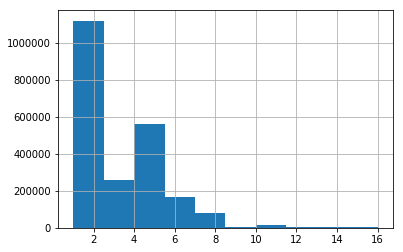

In [634]:
df['accommodates'].hist();

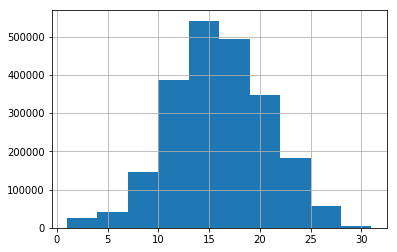

In [636]:
df['amenities'].hist();

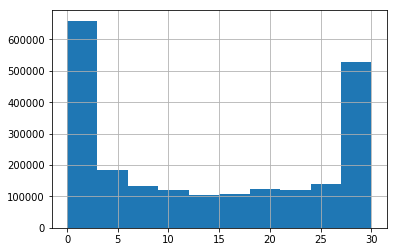

In [640]:
df['availability_30'].hist();

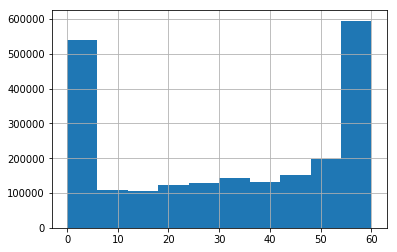

In [641]:
df['availability_60'].hist();

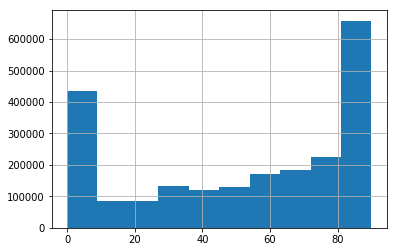

In [642]:
df['availability_90'].hist();

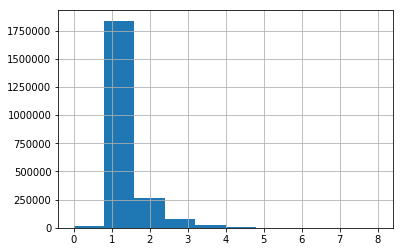

In [643]:
df['bathrooms'].hist();

Below code copied from:
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

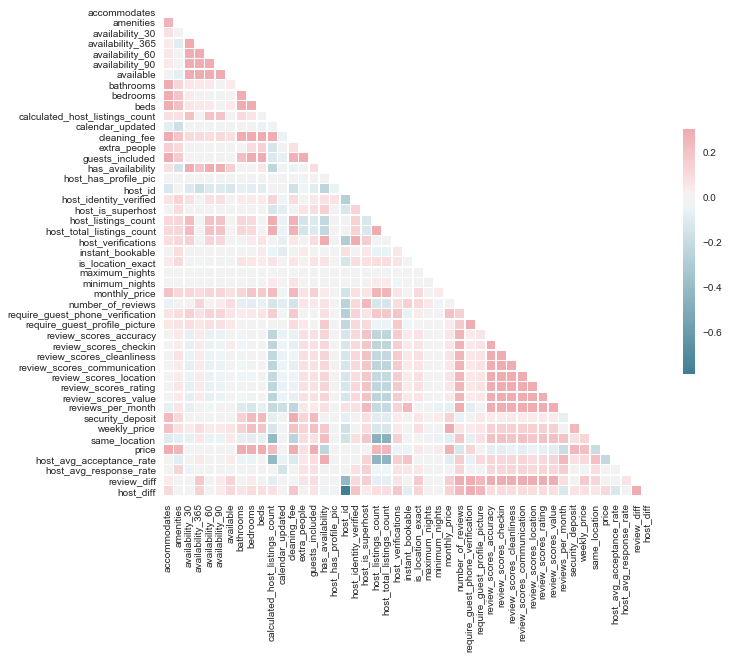

In [29]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From above diagram, we see that host_diff and host id is related and I suppose the reason is that host id is assigned by date joined. We can delete id. A lot of columsn are related and there are many of them. For instance, available is strongly correlated with availability_30,60,90, etc. So, let's delete the others and keep only available.

In [114]:
df_new.drop(inplace=True,columns='host_id')

In [115]:
df_new.drop(inplace=True,columns=['availability_30','availability_90','availability_60','availability_365'])

We can see that all values with review score are strongly correlated. Let's keep one and delete the others.

In [116]:
df_new['review']=df_new['review_scores_value']
df_new = df_new[df_new.columns.drop(list(df_new.filter(regex='review_scores')))]

We can delete host listings count as total take care of it.

In [117]:
df_new.drop(inplace=True,columns='host_listings_count')

In [5]:
df_new = pd.read_pickle('./complete_data.pkl')

In [118]:
df_new.drop(inplace=True,columns=['host_total_listings_count'])

Time to answer questions:
1. Can we come up with a model that can predict good reviews?
2. What are the most important 10 features in determining reviews?
3. Can we generalize our model to any city or are models specific to cities? That we have to do our analysis to each of Seattle and Boston and compare them with our answers in 1 and 2.

Base Model: Linear Regression

In [6]:
X = df_new.drop(columns=['review'])
Y = df_new['review']

In [120]:

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)

In [121]:

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_preds = lm_model.predict(X_test)
r2_ =  r2_score(y_test,y_preds)
print(r2_)

0.36100784720873613


So the score of our model is 36% which is horrible. Let's try to find a model that can predict trying my best to get above 50% or beat base model.

Decission Tree Classifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
selector = SelectKBest(chi2, k=10)
selector.fit(X,Y)
X_new = selector.transform(X)
print(X_new.shape)

X.columns[selector.get_support(indices=True)]

vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)


(2224310, 10)
['calculated_host_listings_count', 'host_total_listings_count', 'maximum_nights', 'monthly_price', 'number_of_reviews', 'security_deposit', 'weekly_price', 'price', 'review_diff', 'host_diff']


In [8]:
X=df_new[vector_names]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_preds=clf.predict(X_test)
score_=accuracy_score(y_test, y_preds)
print(score_)

0.9944507135546155


Great result using Decission tree classifier!!! This answers first and second question.

Index(['accommodates', 'amenities', 'available', 'bathrooms', 'bedrooms',
       'beds', 'calculated_host_listings_count', 'calendar_updated',
       'cleaning_fee', 'extra_people',
       ...
       'property_type_Loft', 'property_type_Other', 'property_type_Tent',
       'property_type_Townhouse', 'property_type_Treehouse',
       'property_type_Villa', 'property_type_Yurt', 'room_type_Private room',
       'room_type_Shared room', 'review'],
      dtype='object', length=172)

In [141]:
Boston = df_new[df_new['city']=='boston']
Seattle = df_new[df_new['city']=='seattle']


In [142]:
X_b = Boston.drop(columns=['review','city'])
Y_b = Boston['review']
X_s = Seattle.drop(columns=['review','city'])
Y_s = Seattle['review']

In [136]:
selector = SelectKBest(chi2, k=10)
selector.fit(X_b,Y_b)
X_b_new = selector.transform(X_b)

X_b.columns[selector.get_support(indices=True)]

vector_names = list(X_b.columns[selector.get_support(indices=True)])


In [143]:
X_b=X_b[vector_names]

In [135]:
selector = SelectKBest(chi2, k=10)
selector.fit(X_s,Y_s)
X_s_new = selector.transform(X_s)

X_s.columns[selector.get_support(indices=True)]

vector_names = list(X_s.columns[selector.get_support(indices=True)])


In [144]:
X_s=X_s[vector_names]

Our original model had these variables:
['calculated_host_listings_count', 'cleaning_fee', 'maximum_nights', 'monthly_price', 'number_of_reviews', 'security_deposit', 'weekly_price', 'price', 'review_diff', 'host_diff']
Which is the same in case of Boston but Seattle has reviews per month rather than number of reviews. Let's use our model on Seattle and Boston each.

In [145]:
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, Y_b , test_size=.30, random_state=42)
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, Y_s , test_size=.30, random_state=42)

I will not retrain model. Instead, I will use it on test data directly.

In [146]:
y_b_preds=clf.predict(X_b_test)
score_1=accuracy_score(y_b_test, y_b_preds)
print(score_1)

0.994562564528869


In [147]:
y_s_preds=clf.predict(X_s_test)
score_2=accuracy_score(y_s_test, y_s_preds)
print(score_2)

0.9994533311871521


This is good result and shows that our model can be extended to new cities.

In [149]:
import pickle
filename = './finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [18]:
import pickle
filename = './finalized_model.sav'
dtree = pickle.load(open(filename, 'rb'))

In [14]:
with open("./airbnb_classifier.dot", "w") as f:
    f = tree.export_graphviz(dtree, out_file=f,max_depth=5,feature_names=vector_names)

The above code shows decission tree structure. Below code was borrowed from:
https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
It shows decission tree classifier on data.

In [19]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

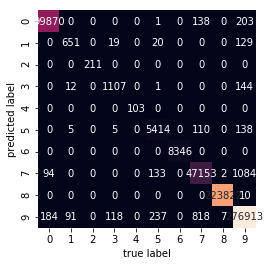

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

The above shows confusion matrix. We see that labels 8-10 have some issues to them in addition to 1.